In [1]:
#Lab: Classification with Decision Trees

from sklearn import tree # to build decision tree
from matplotlib import pyplot as plt # to visualize the data


In [2]:
#Binary classification
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]
Y = [1, 1, 0, 0, 1, 1]

clf = tree.DecisionTreeClassifier()
#training phase
clf = clf.fit(X, Y)

#testing phase
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

array([1, 1, 0])

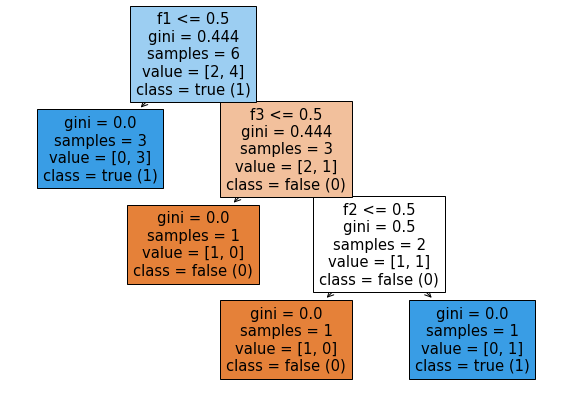

In [3]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


In [59]:
### The compass dataset

## What are the features?
# Features are each component of the individual data vectors used during training and testing

## How many examples in the dataset?
# 6

## What are your expectations regarding the most important features?
# Higher accuracy and higher influence toward a correct decision

## Propose (informally) a way to reduce the dataset
# Eliminate the less important features

## There many ways to binarize the dataset. How do you propose to do so?

# By evaluating the entropy for each potential feature:
# If the feature is unique or almost unique to each individual (such as LastName and FirstName), we can ignore it
# If there is a clear distinction between more than two groups of individual (such as Ethnicity), we can transform this non binary feature into multiple binary feature (ex: isAfricanAmerican, isCaucasian, isAsian)

import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
#train_examples : Features verified by each example 
#train_labels: Label associated to each example 
#feature: fancy names for each features
#prediction: the feature targeted for prediction (and labeled in the training phase)

In [88]:
## We will be studying three parameters:splitter, max_depth, min_samples_leaf
## What do they represent?
# splitter: Strategy to establish a choice for each node
# max_dept: when to stop expanding
# min_sample_leaf: 
def crossValidation(examples,labels,prediction,k,p, splitter="best", max_depth=None, min_samples_leaf=1) : 
    ## Shuffling data
    _ = [ [examples[i],labels[i]] for i in range(len(examples))]
    np.random.shuffle(_)
    
    ## Splitting data into k groups  
    _ = np.split( np.array(_,dtype=tuple) , [ (i+1)*int(np.floor(len(_)/k)) for i in range(k)] )[:-1]
    
    for i in range(len(_)) :
        group = _[i]
        ## Selecting test and training data sets for each group
        split = np.split( group , [ int(np.floor(p*len(group)/100)) , len(group)] )
        train,test = split[0],split[1]
        
        ## Training
        X,Y = [t[0] for t in train],[t[1] for t in train]
        clf = tree.DecisionTreeClassifier(splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf).fit(X,Y)
        
        # Testing
        X,Y = [t[0] for t in test],[t[1] for t in test]
        _[i] = clf.score(X,Y)
        
    return _

# 5-cross-validation
print("splitter=\"best\", max_depth=None, min_samples_leaf=1: \n",crossValidation(train_examples, train_labels, prediction, 5, 80))
print("splitter=\"random\", max_depth=None, min_samples_leaf=1: \n",crossValidation(train_examples, train_labels, prediction, 5, 80,splitter="random"))
print("splitter=\"random\", max_depth=None, min_samples_leaf=1: \n",crossValidation(train_examples, train_labels, prediction, 5, 80,splitter="random"))


splitter="best", max_depth=None, min_samples_leaf=1: 
 [0.6161137440758294, 0.6398104265402843, 0.6208530805687204, 0.6066350710900474, 0.6350710900473934]
splitter="random", max_depth=None, min_samples_leaf=1: 
 [0.6255924170616114, 0.6682464454976303, 0.6492890995260664, 0.6018957345971564, 0.6161137440758294]
